## Data Analysis And Machine Learning on Campus Placement Data

- **Explatory Data Analysis**
- **Prediction of  student's Placement  (Binary Classification)**
- **Determinination of  characteristics affecting placements**


### Common Questions
* **Does GPA affect placement?**
* **Does Higher Secondary School's Percentage still affect campus placement?**
* **Does board of education affect campus placement?**
* **Is work experience required for securing good job?**



# Library Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
svc = SVC()


# Loading Data

In [ ]:
df = pd.read_csv("/content/Placement_Data_Full_Class.csv")
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR 

# Exploratory Data Analysis

## Exploring Data by each Features

### Feature: Gender
#### Does gender affect placements?

In [ ]:
df.gender.value_counts()
# Almost double

M    139
F     76
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


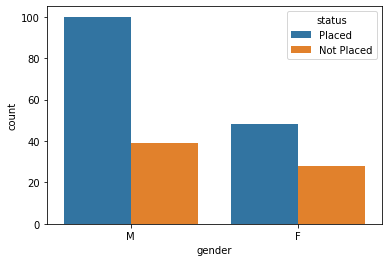

In [ ]:
sns.countplot("gender", hue="status", data=df)
plt.show()

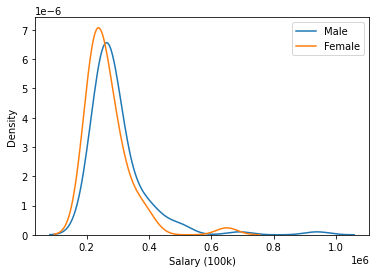

In [ ]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(df.salary[ df.gender=="M"])
sns.kdeplot(df.salary[ df.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


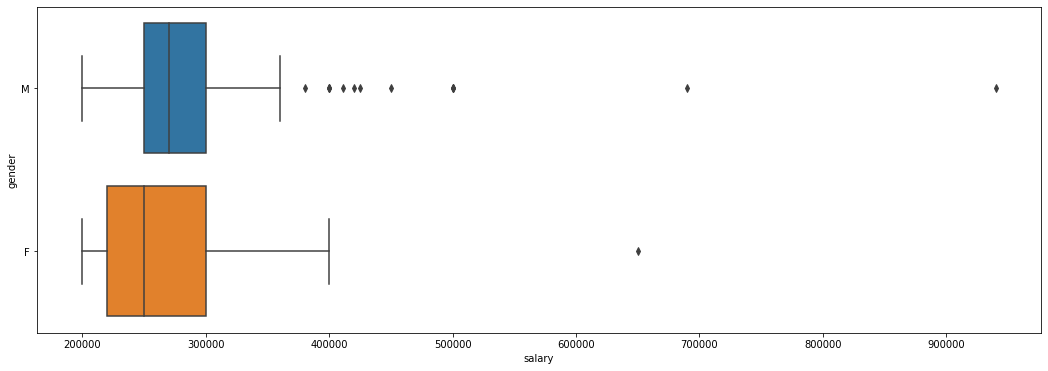

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=df)
plt.show()

#### Insights

* We have samples of 139 Male studets and 76 Female students.
* 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets. 
* More outliers on Male -> Male students are getting high CTC jobs.
* Male students are offered slightly greater salary than female on an average. 


### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
#### Does Secondary Education affect placements?

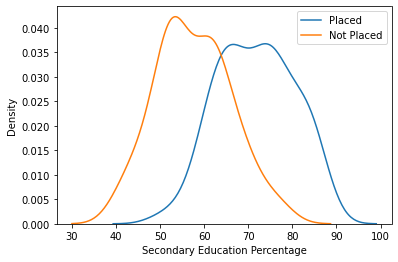

In [ ]:
#Kernel-Density Plot
sns.kdeplot(df.ssc_p[ df.status=="Placed"])
sns.kdeplot(df.ssc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

* All students with Secondary Education Percentage above 90% are placed
* Most of the students with Secondary Education Percentage below 50% are not-placed
* **Students with good Secondary Education Percentage are placed on average.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


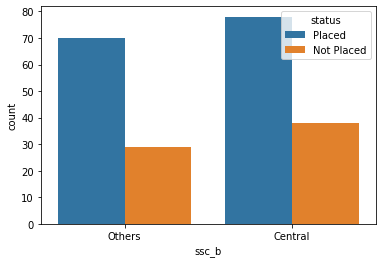

In [ ]:
sns.countplot("ssc_b", hue="status", data=df)
plt.show()

* Board Of Education does not affect Placement Status much

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


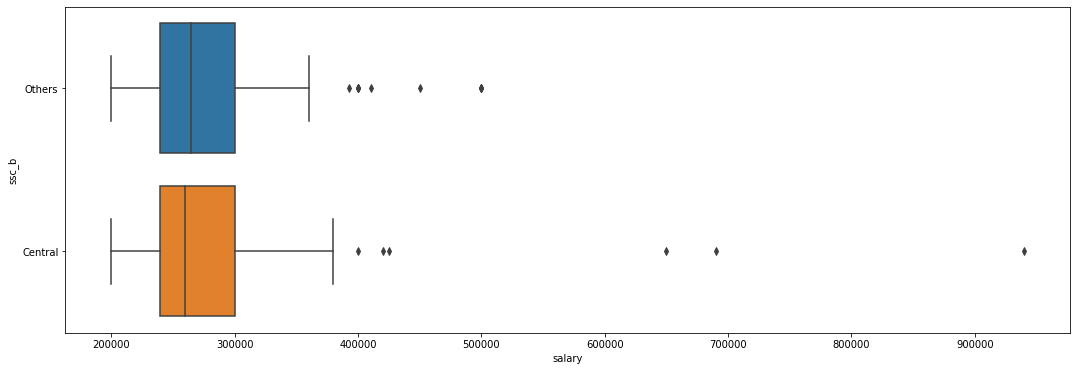

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=df)
plt.show()

* Outliers on both, but students from Central Board are getting the highly paid jobs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


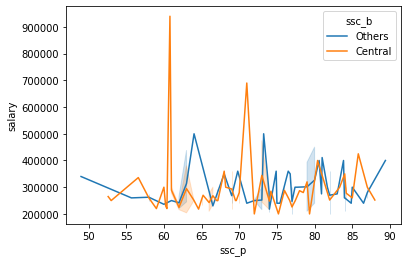

In [ ]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=df)
plt.show()

* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

### Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education)
#### Does Higher Secondary School affect Placements?

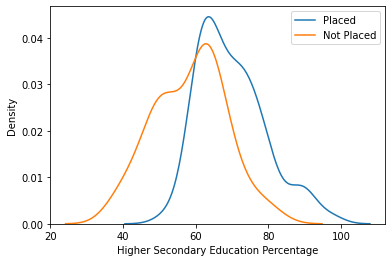

In [ ]:
#Kernel-Density Plot
sns.kdeplot(df.hsc_p[ df.status=="Placed"])
sns.kdeplot(df.hsc_p[ df.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

* Overlap between two graphs here too. More placements for %age above 65%
* Straight drop below 60 in placements -> %age must be atleast 60 for chance of being placed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


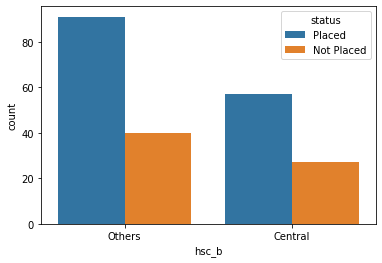

In [ ]:
sns.countplot("hsc_b", hue="status", data=df)
plt.show()

Education Board again, doesn't affect placement status much

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


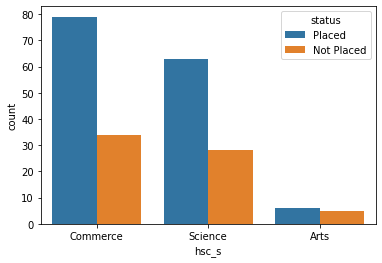

In [ ]:
sns.countplot("hsc_s", hue="status", data=df)
plt.show()

* We have very less students with Arts specialization.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


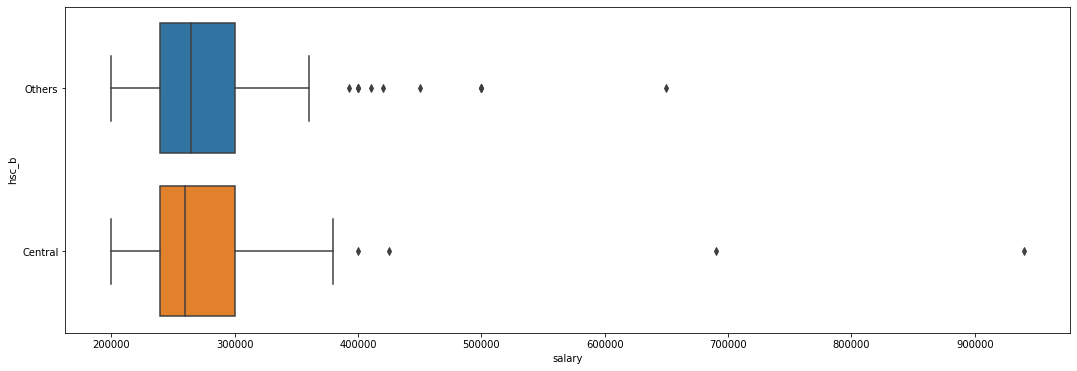

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=df)
plt.show()

* Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


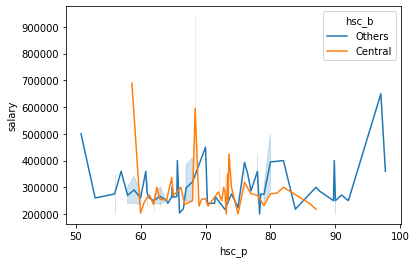

In [ ]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=df)
plt.show()

* High salary from both Central and Other. 
* High salary for both high and low percentage.
* Thus, both these feature doesnot affect salary.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


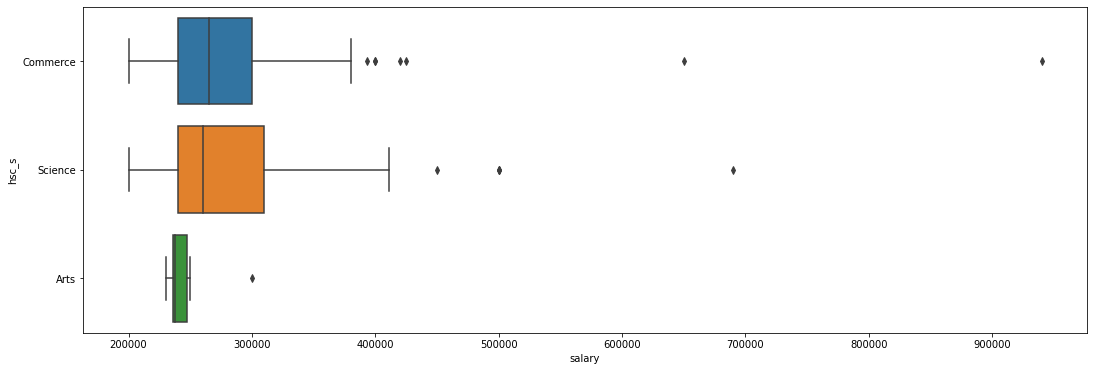

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=df)
plt.show()

* We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.

* Commerse students have slightly better placement status.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


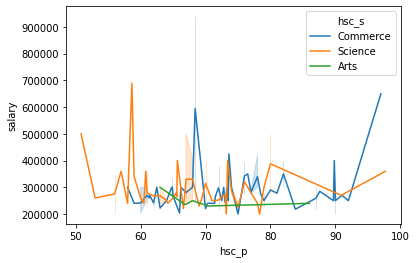

In [ ]:
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=df)
plt.show()

* **Student with Art Specialization surprisingly have comparatively low salary**

# Data Cleaning

In [ ]:
#Getting all the categorical columns except the target
categorical_columns = df.select_dtypes(exclude = 'number').drop('status', axis = 1).columns

print(categorical_columns)

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')


In [ ]:
# First considering only numerical values for feature selection
X = df.iloc[:,[2,4,7,10,12,14]].values
Y = df.iloc[:,13].values

In [ ]:
print(X)

[[6.700e+01 9.100e+01 5.800e+01 5.500e+01 5.880e+01 2.700e+05]
 [7.933e+01 7.833e+01 7.748e+01 8.650e+01 6.628e+01 2.000e+05]
 [6.500e+01 6.800e+01 6.400e+01 7.500e+01 5.780e+01 2.500e+05]
 ...
 [6.700e+01 6.700e+01 7.300e+01 5.900e+01 6.972e+01 2.950e+05]
 [7.400e+01 6.600e+01 5.800e+01 7.000e+01 6.023e+01 2.040e+05]
 [6.200e+01 5.800e+01 5.300e+01 8.900e+01 6.022e+01       nan]]


In [ ]:
print(Y)

['Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Not Placed' 'Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Plac

In [ ]:
len(df)

215

# Null values

In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# So salary column contains null values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[5]])
X[:,[5]] = imputer.transform(X[:,[5]])

In [ ]:
print(X)

[[6.70000000e+01 9.10000000e+01 5.80000000e+01 5.50000000e+01
  5.88000000e+01 2.70000000e+05]
 [7.93300000e+01 7.83300000e+01 7.74800000e+01 8.65000000e+01
  6.62800000e+01 2.00000000e+05]
 [6.50000000e+01 6.80000000e+01 6.40000000e+01 7.50000000e+01
  5.78000000e+01 2.50000000e+05]
 ...
 [6.70000000e+01 6.70000000e+01 7.30000000e+01 5.90000000e+01
  6.97200000e+01 2.95000000e+05]
 [7.40000000e+01 6.60000000e+01 5.80000000e+01 7.00000000e+01
  6.02300000e+01 2.04000000e+05]
 [6.20000000e+01 5.80000000e+01 5.30000000e+01 8.90000000e+01
  6.02200000e+01 2.88655405e+05]]


### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
#### Does Under Graduate affect placements? 

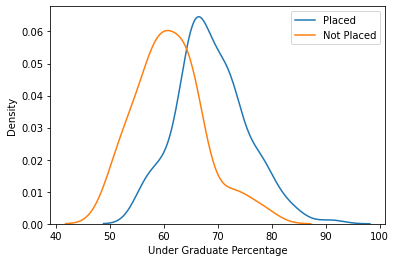

In [ ]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

* Overlap here too. But More placements for percentage above 65.
* UG Percentage least 50% to get placement

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


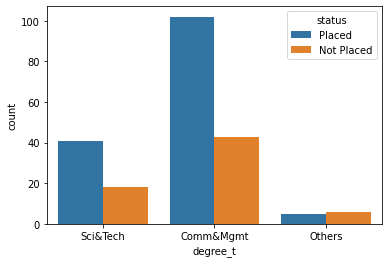

In [ ]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

* We have very less students with "Other". We cant make decision from few cases.
* Around 2:1 placed:unplaced  ratio for both Science and Commerse students

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


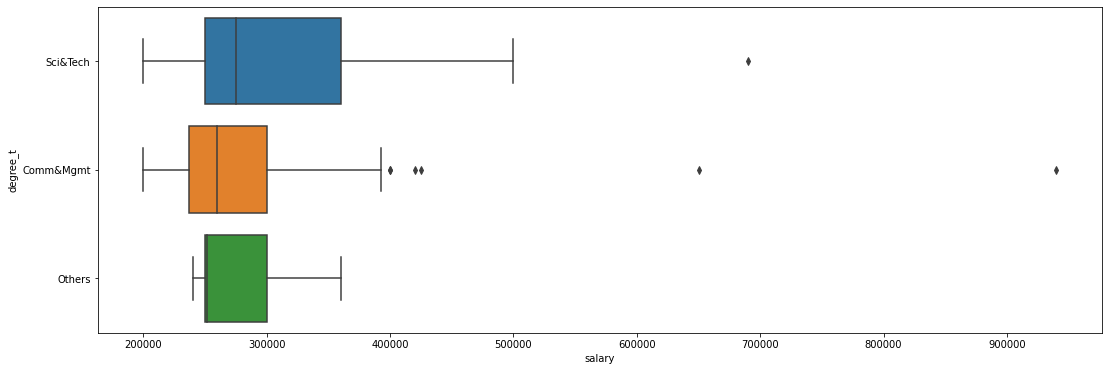

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

* Science&Tech students getting more salary on average
* Management stidents are getting more highly paid dream jobs. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


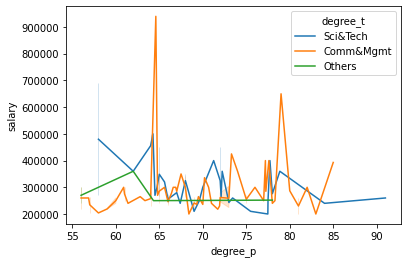

In [ ]:
sns.lineplot("degree_p", "salary", hue="degree_t", data=data)
plt.show()

* Percentage does not seem to affect salary.
* Commerce&Mgmt students occasionally get dream placements with high salary

### Feature: workex (Work Experience)
#### Does Work Experience affect placements?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


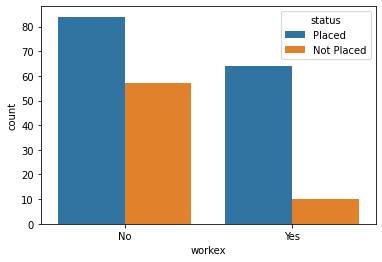

In [ ]:
sns.countplot("workex", hue="status", data=data)
plt.show()

* **This affects Placement.** Very few students with work experience not getting placed!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


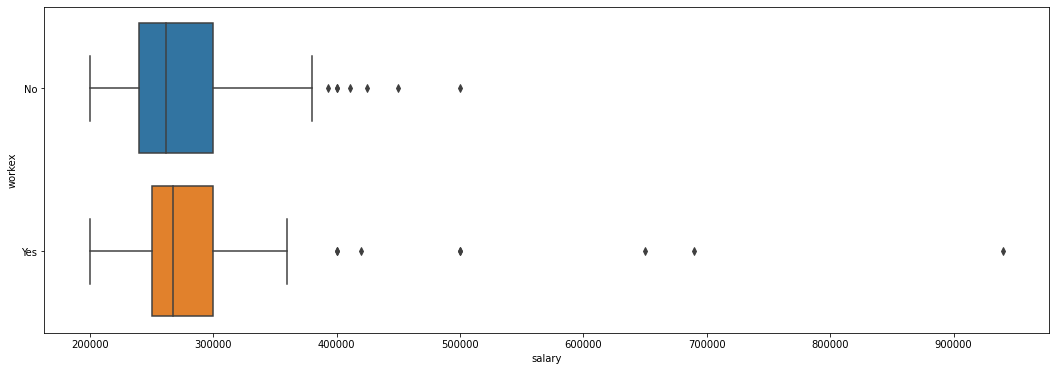

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

* Outliers (High salary than average) on bith end but **students with experience getting dream jobs**
* Average salary as well as base salary high for students with work experience.

### Feature: etest_p  (Employability test percentage)

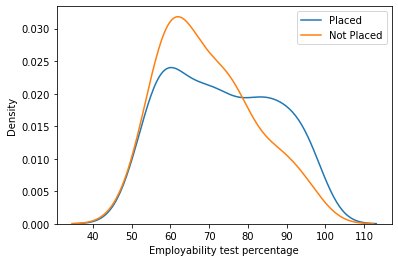

In [ ]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


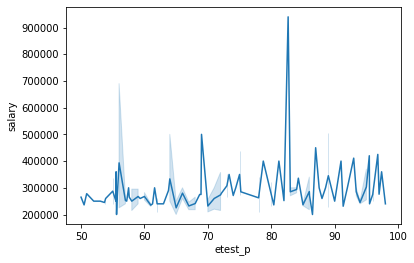

In [ ]:
sns.lineplot("etest_p", "salary", data=data)
plt.show()

**This feature surprisingly does not affect placements and salary much**

### Feature: specialisation (Post Graduate Specialization)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


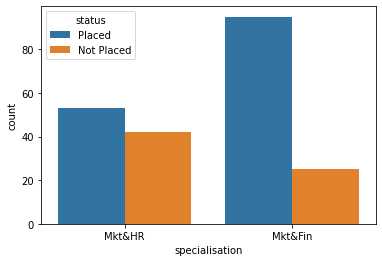

In [ ]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

* This feature affects Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


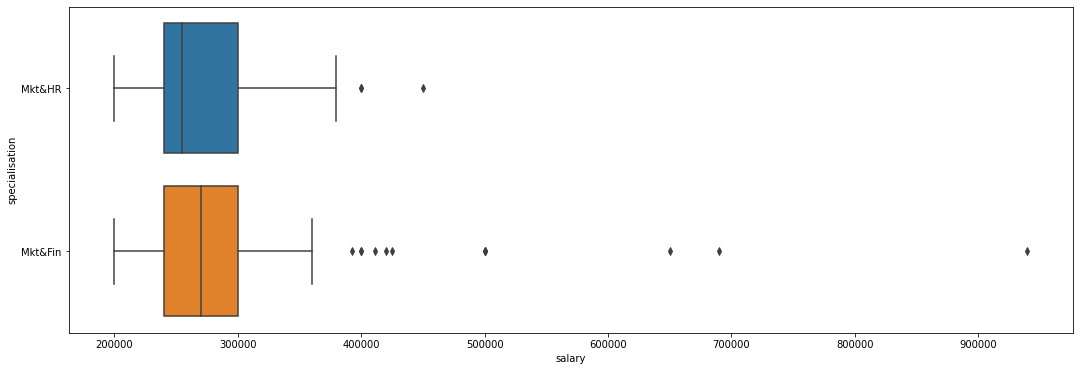

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

* **More Highly Paid Jobs for Mkt&Fin students **

### Feature: mba_p (MBA percentage)
#### Does MBA Percentage affect placements?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


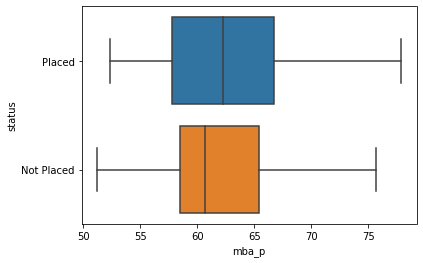

In [ ]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


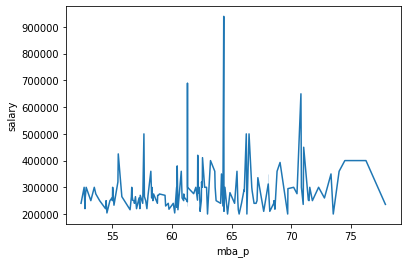

In [ ]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA Percentage also deos not affect salary much

# Feature Selection

Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage

Will compute feature importance later on.


# Data Pre-Processing

In [ ]:
df.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

## Feature Encoding

In [ ]:
df.dtypes
# We have to encode gender,hsc_s, degree_t, workex, specialisation and status

sl_no               int64
gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# Problem Statement

* Predicting If Students gets placed or not (Binary Classification Problem)


In [ ]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf = df.copy()


In [ ]:
# Library imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


# ML MODELS

### Dropping Salary Feature

Filling 0s for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary.

In [ ]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### RANDOM FOREST

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_accuracy = random_forest.score(X_test, y_test)
random_forest_accuracy

0.7906976744186046

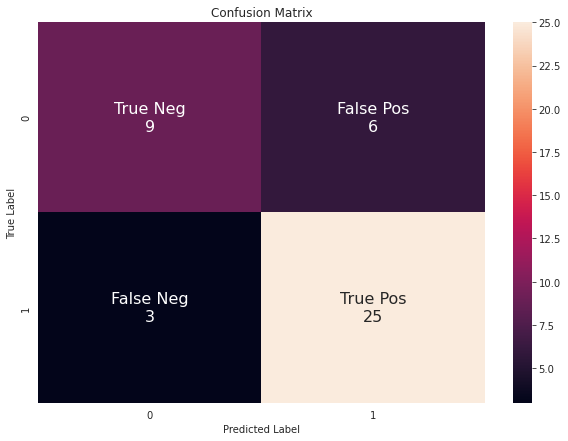

In [ ]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(y_test, random_forest_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
random_forest_f1= f1_score(y_test, random_forest_Y_pred)
print(random_forest_f1)

0.8474576271186439


### KNN CLASSIFICATION

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)
knn_accuracy

0.7906976744186046

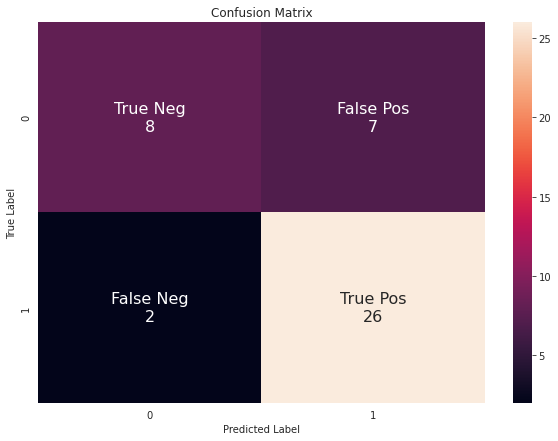

In [ ]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(y_test, knn_Y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# getting precision, recall and f1-score via classification report

print(classification_report(y_test, knn_Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.79      0.93      0.85        28

    accuracy                           0.79        43
   macro avg       0.79      0.73      0.75        43
weighted avg       0.79      0.79      0.78        43



In [ ]:
knn_f1= f1_score(y_test, knn_Y_pred)
print(knn_f1)

0.8524590163934426


# SVC TUNING

In [ ]:
model = SVC()
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))
svc_accuracy=accuracy_score(y_test, grid_predictions)
print(svc_accuracy)
svc_f1=f1_score(y_test, grid_predictions)
print(svc_f1)


              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.84      0.93      0.88        28

    accuracy                           0.84        43
   macro avg       0.84      0.80      0.81        43
weighted avg       0.84      0.84      0.83        43

0.8372093023255814
0.8813559322033899


# Gaussin Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 

In [ ]:
model=GaussianNB()

In [ ]:
np.logspace(0,-9, num=10)


array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.15199110829529336}

In [ ]:
gs_NB.best_score_

0.8194444444444444

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

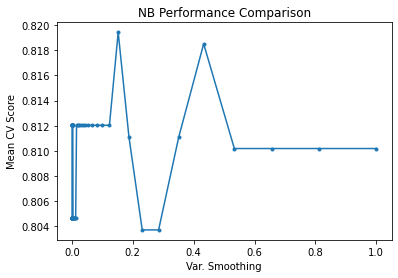

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_gnb = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_gnb)
gnb_f1= f1_score(y_test, predict_test)
print(gnb_f1)

accuracy_score on test dataset :  0.8837209302325582
0.9090909090909091


### BEST PERFORMING MODEL

In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'SVC','Random Forest','Gaussian Naive bayes'],
    'Score': [knn_accuracy, svc_accuracy, random_forest_accuracy,accuracy_gnb,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Gaussian Naive bayes,0.883721
1,SVC,0.837209
0,KNN,0.790698
2,Random Forest,0.790698


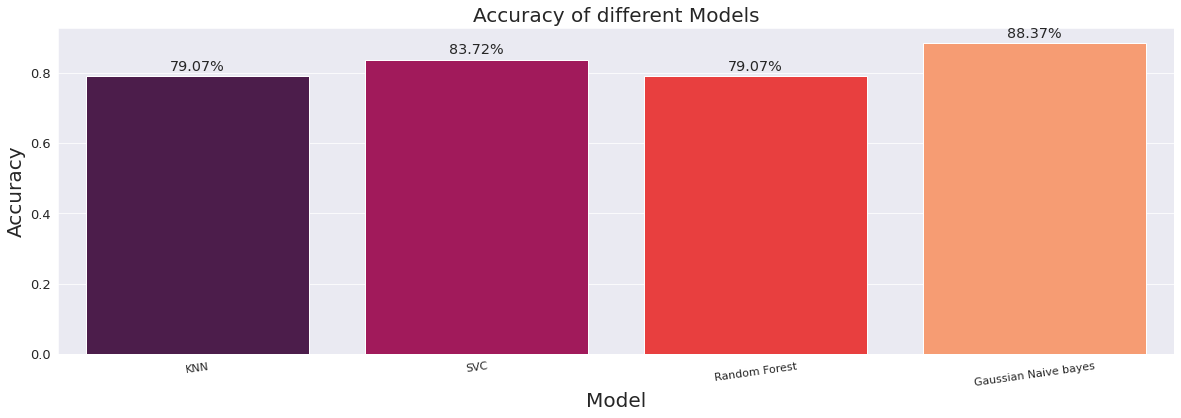

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'SVC','Random Forest','Gaussian Naive bayes'],
    'Score': [knn_accuracy, svc_accuracy, random_forest_accuracy,accuracy_gnb,]})

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Score',data = models , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

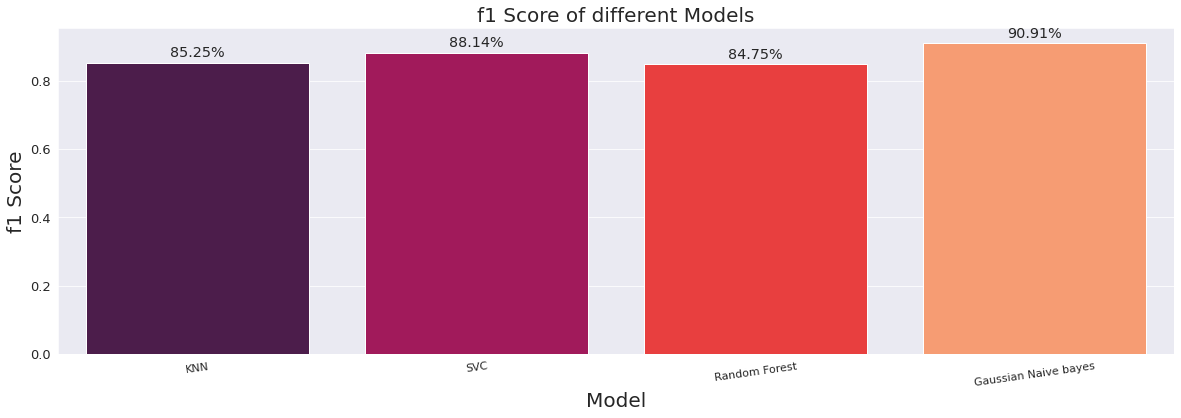

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'SVC','Random Forest','Gaussian Naive bayes'],
    'Score': [knn_f1, svc_f1, random_forest_f1,gnb_f1,]})


plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Score',data = models , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("f1 Score", fontsize = 20)
plt.title("f1 Score of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

### INSIGHTS
1.   It is seen that out of the 4 models gaussian naive bayes Model Performs The Best
2.   It has an accuracy of about 88.37 %



### Binary Classification with Logistic Regression

### One Hot Encoding

Encoding Categorical Features 

In [ ]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
#One-Hot Encoding
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

### Feature Scaling

* Percentages are on scale 0-100 
* Categorical Features are on range 0-1 (By one hot encoding)
* High Scale for Salary -> Salary is heavily skewed too -> SkLearn has RobustScaler which might work well here

**Scaling Everything between 0 and 1 (This wont affect one-hot encoded values)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7538461538461538

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.76      0.93      0.84        44

    accuracy                           0.75        65
   macro avg       0.74      0.66      0.67        65
weighted avg       0.75      0.75      0.73        65



### [Computating Feature importance by Mean Decrease Accuracy (MDA)](https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html)

**Since Logistic Regression performed well, Lets run another method for determining fearure importance here.**


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.0 MB/s 
     |████████████████████████████████| 133 kB 48.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=8530ec56374c1f2ec0aeaf6bbe213f65ba11ccae80e96bfd8715c86751fb6ebe
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logistic_reg).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.1692 ± 0.1066,x0
0.0708 ± 0.0314,x1
0.0462 ± 0.0435,x2
0.0400 ± 0.0314,x10
0.0338 ± 0.0452,x13
0.0338 ± 0.0452,x12
0.0185 ± 0.0230,x4
0.0185 ± 0.0359,x15
0.0154 ± 0.0584,x14
0.0123 ± 0.0529,x16


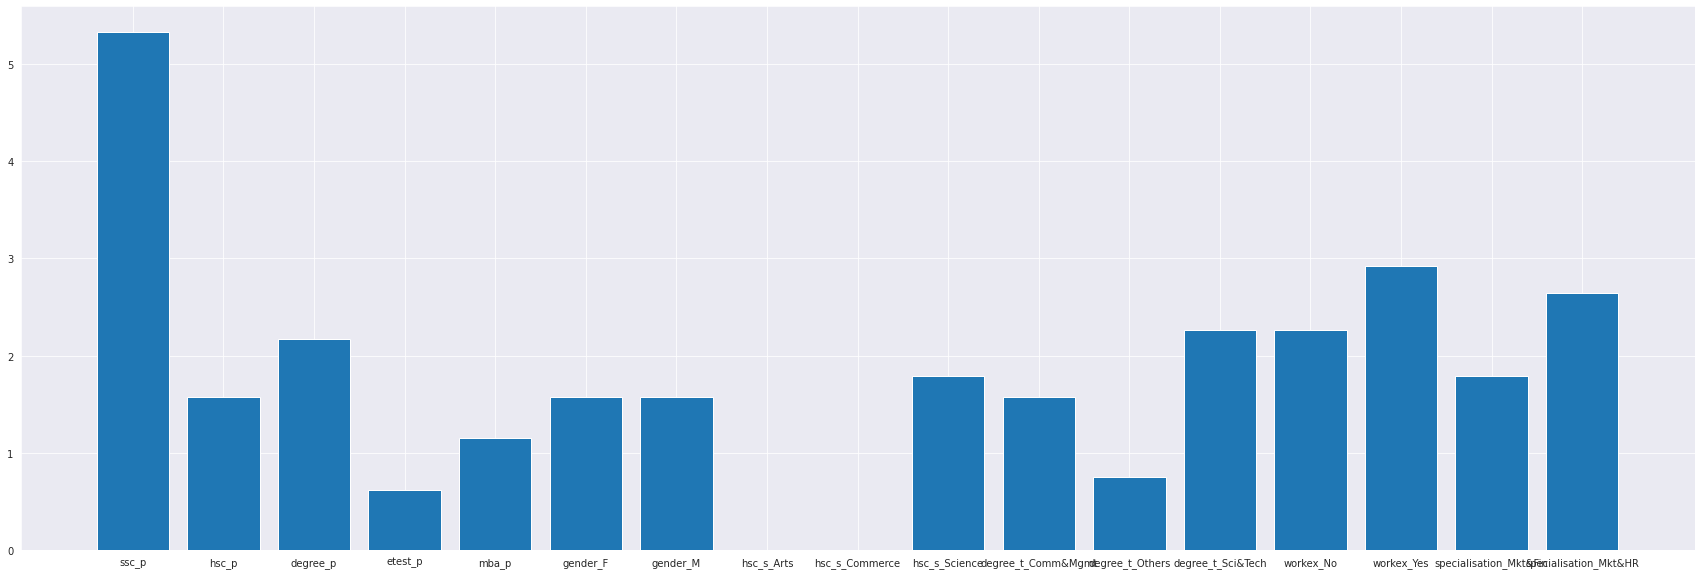

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(colmunn_names , perm.feature_importances_std_ * 100)
plt.show()

**From Feature Importance of Tree-based Algorithms and MDA we can conclude that:**
* Academic performance affects placement (All percentages had importantance)
* Work Experience Effects Placement
* Gender and Specialization in Commerse (in higher-seondary and undergraduate) also has effect on placements.